<a href="https://colab.research.google.com/github/subhasiz/python/blob/master/EXP_6_Moments_Skewness_Kurtosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Moments

In mathematics, a moment is a specific quantitative measure of the shape of a function. Moments are a set of statistical parameters to measure a distribution.

If the function is a probability distribution, then the zeroth moment is the total probability (i.e. one), the first moment is the expected value (mean), the second central moment is the variance, the third standardized moment is the skewness, and the fourth standardized moment is the kurtosis.

The $r$-th moment of a real-valued continuous function $f(x)$ of a real variable about a value $c$ is

$${\mu _{n}=\int _{-\infty }^{\infty }(x-c)^{r}\,f(x)\,\mathrm {d} x}$$

In case of a discrete-valued probability distribution function $p(x)$, the $r$-th moment can be found using -

$${\mu _{n}={\frac{1}{N}}{\sum _{x\:\in\:X }(x-c)^{r}}}$$

Implement the function below to find the $r$-th moment of the data given an array, $X$, of data points, and value $c$.

In [ ]:
def moment(X,c,r):
  # Input --> X - array of data; c - Integer; r - Integer
  N = len(X)
  sq = 0
  for x in X:
    sq+= (x-c)**r
  moment = sq/N
  return moment

Moments can be calculated around three variables -
1.   Zero ($c=0$)
2.   Mean ($c=\mu$) (Moments calculated around the mean are called ```central moments```.)
3.   Constant ($c$ is a constant)

Let us consider the marks data that we worked with in the last example.

In [ ]:
marks = [72,90,95,57,78,83,95,43,64,60,54,52,81,72,53,75,89,32,42,58,69,75,54,73,71,74,54,69,70,70,74,65,72,42,87,81,81,64,90,56,61,73,58,\
         65,56,54,65,71,74,84,55,69,44,78,84,41,85,55,59,17,74,39,61,80,58,64,37,72,58,64,63,55,51,57,49,41,26,78,74,68,49,45,47,64,39,80,\
         83,71,70,86,72,34,79,45,86,81,66,72,67,67,67,74,91,44,86,67,100,63,76,64,89,55,53,58,100,77,85,82,63,69,92,89,93,57,80,95,68,77,82,\
         49,84,37,74,81,79,55,54,55,66,61,72,62,55,43,73,39,84,68,75,100,67,67,70,49,67,89,74,60,86,62,78,88,53,53,92,100,51,76,83,75,73,88,\
         86,67,51,91,54,77,70,100,68,64,50,69,52,67,76,66,52,88,65,83,64,62,84,55,69,56,53,79,84,81,77,69,41,71,62,80,81,61,79,28,62,51,91,\
         83,86,42,77,56,68,85,65,80,66,56,72,50,72,95,64,43,86,87,82,75,66,60,52,80,68,83,52,51,74,76,76,70,64,60,49,83,70,80,52,73,73,77,\
         75,81,79,79,50,93,73,42,75,72,92,76,63,49,53,70,85,78,92,63,86,56,52,48,79,78,46,82,82,89,75,76,70,73,60,73,77,62,41,74,46,87,78,\
         54,84,76,75,67,87,52,71,57,76,60,61,67,64,66,82,72,71,65,79,86,81,53,46,90,61,23,75,55,60,37,56,78,93,68,70,51,38,55,61,73,76,72,73,\
         80,61,94,74,74,65,57,78,58,71,72,61,66,62,90,62,84,58,34,60,58,58,66,64,84,77,73,74,97,70,43,90,95,83,64,86,100,81,49,43,76,73,78,64,\
         70,67,68,67,54,74,45,67,89,63,59,54,43,65,99,59,73,65,80,57,84,71,83,66,67,72,73,74,73,59,56,93,58,58,85,39,67,83,71,59,63,66,72,56,\
         66,48,68,66,56,88,81,81,73,83,82,74,66,81,46,73,85,92,77,58,61,56,89,54,100,65,58,54,70,90,58,87,31,67,88,74,85,69,86,67,90,76,62,68,\
         71,71,59,68,52,52,74,47,75,53,82,85,64,83,88,64,64,48,78,69,71,79,87,61,89,59,82,70,59,78,92,71,50,49,61,97,87,89,74,78,78,49,86,58,59,\
         52,60,61,53,41,74,67,54,61,88,69,83,60,66,66,92,69,82,77,95,63,83,100,67,67,72,76,90,48,62,45,39,72,67,70,66,75,74,90,80,51,43,100,71,48,\
         68,75,96,62,66,81,55,51,91,56,61,97,79,73,75,77,76,73,63,64,66,57,62,68,76,100,79,24,54,77,82,60,29,78,57,89,72,84,58,64,63,60,59,90,77,\
         93,68,45,78,81,73,61,63,51,96,58,97,70,48,57,51,64,60,74,88,84,74,80,92,76,74,52,88,81,79,65,81,70,62,53,79,56,80,86,70,79,67,67,66,60,87,\
         77,66,71,69,63,60,73,85,74,72,76,57,78,84,77,64,78,82,75,61,72,68,55,40,66,99,75,78,58,90,53,76,74,77,63,89,82,72,78,66,81,67,84,64,63,72,\
         34,59,87,61,84,85,100,81,70,94,78,96,76,73,72,59,90,48,43,74,75,51,92,39,77,46,89,47,58,57,79,66,71,60,73,57,84,73,55,79,75,64,60,84,69,72,\
         77,90,55,95,58,68,59,77,72,58,81,62,63,72,75,62,71,60,48,73,67,78,65,58,72,44,79,85,56,90,85,59,81,51,79,38,65,65,62,66,74,84,52,68,70,84,\
         60,55,73,80,94,85,76,81,74,45,75,54,31,47,64,84,80,86,59,70,72,91,90,90,52,87,58,67,68,69,86,54,60,86,60,82,50,64,64,82,57,77,52,58,44,77,\
         65,85,85,54,72,75,67,68,85,67,64,97,68,79,49,73,62,86,42,71,93,82,53,42,74,51,58,72,84,90,62,64,82,61,72,76,64,70,73,46,51,76,100,72,65,51,\
         85,92,67,74,62,34,29,78,54,78,84,78,48,100,84,77,48,84,75,64,42,84,61,62,61,70,100,61,77,96,70,53,66,65,70,64,56,61,43,56,74,57,71,75,87,\
         63,57,58,81,68,66,91,66,62,68,61,82,58,50,75,73,77,74,52,69,57,87,100,63,81,58,54,100,76,57,70,68,63,76,84,100,72,50,65,63,82,62,65,41,95,\
         24,78,85,87,75,51,59,75,45,86,81,82,76,72,63,99,55,71,78,86,59,64]

Let us calculate the four moments of the ```marks``` data.

---
##The first moment: **mean**

The ```mean``` of a dataset is the $1^{st}$ moment around $0$.

$$\mu = {\mu _{1}={\frac{1}{N}}{\sum _{x\:\in\:X }x}}$$

Use the ```moment``` function defined above to find the ```mean``` of the ```marks``` data.

The first parameter, $X$, to the function would be the ```marks``` list. Provide the remaining parameters as necessary.

In [ ]:
mean = moment(marks, 0,1)
print("The first moment is ="+str(mean))

The first moment is =69.169


##The second moment: **variance**

The ```variance``` of a dataset is the $2^{nd}$ moment around the ```mean```.

$${\sigma}^2 = {\mu _{2}={\frac{1}{N}}{\sum _{x\:\in\:X }(x-\mu _{1})^{2}}}$$

Use the ```moment``` function defined above to find the ```mean``` of the ```marks``` data.

The first parameter, $X$, to the function would be the ```marks``` list. Provide the remaining parameters as necessary.

In [ ]:
variance = moment(marks,moment(marks, 0,1),2)
print("The second moment is ="+str(variance))

The second moment is =212.95243900000006


##The third moment: **skewness**

The ```skewness``` is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600" alt="skewness-wikipedia" />

The skewness of a random variable X is the third standardized moment ${{\tilde {\mu }}_{3}}$. It is the ```3rd moment around the mean``` divided by the ```2nd moment around the mean (variance)``` raised to the power $\frac{3}{2}$.

$${\tilde {\mu }}_{3}=\frac{{\frac{1}{N}}{\sum{{(x-\mu)}^3}}}{{(\sigma^{2})}^{\frac{3}{2}}}$$

where $\mu$ is the ```mean (1st moment around 0)``` and ${\sigma^{2}}$  is the ```variance (2nd moment around mean)``` 

Use the ```moment``` function defined above to find the numerator of the ```skewness``` formula. The first parameter, $X$, to the function would be the ```marks``` list. Provide the remaining parameters as necessary. (HINT: You have already calculated ```mean``` $(\mu)$ previously. You can reuse the value.)

You need the ```variance``` of the data for the denominator, which you have already calculated. You can reuse the value.

In [ ]:
skewness = moment(marks,moment(marks, 0,1),3) / variance**(3/2)
print("The third moment is ="+str(skewness))

The third moment is =-0.25871569927829297


##The fourth moment: **kurtosis**

Kurtosis is a measure of the ```tailedness``` of the probability distribution of a real-valued random variable. Like skewness, kurtosis describes the shape of a probability distribution.

The ```kurtosis``` of any *univariate* normal distribution is 3. It is common to compare the kurtosis of a distribution to this value.

The ```excess kurtosis``` is defined as kurtosis minus 3. There are 3 distinct regimes as described below. Distributions with zero excess kurtosis are called mesokurtic, or mesokurtotic. A distribution with positive excess kurtosis is called leptokurtic, or leptokurtotic. A distribution with negative excess kurtosis is called platykurtic, or platykurtotic.

<img src="https://www.vosesoftware.com/riskwiki/images/image15_346.gif" />

The kurtosis of a random variable X is the fourth standardized moment ${{\tilde {\mu }}_{4}}$. It is the ```4th moment around the mean``` divided by the ```2nd moment around the mean (variance)``` squared.

$${\tilde {\mu }}_{4}=\frac{{\frac{1}{N}}{\sum{{(x-\mu)}^4}}}{{(\sigma^{2})}^{2}}$$

where $\mu$ is the ```mean (1st moment around 0)``` and ${\sigma^{2}}$  is the ```variance (2nd moment around mean)```.

Use the ```moment``` function defined above to find the numerator of the ```skewness``` formula. The first parameter, $X$, to the function would be the ```marks``` list. Provide the remaining parameters as necessary.

In [ ]:
kurtosis = moment(marks,moment(marks, 0,1),4)/moment(marks,moment(marks, 0,1),2)**2
excess_kurtosis = 3-kurtosis
print("The fourth moment is ="+str(excess_kurtosis))

The fourth moment is =0.07391861478330597


#Conclusion

Let us now use a Python library to find the four moments. Verify that the results you obtained are same as the output of the following code.

(The ```variance``` may differ by a small amount. This is because we are calculating the ```population variance```, whereas the library is calculating the ```sample variance```.)

In [ ]:
from scipy import stats
stats.describe(marks)

DescribeResult(nobs=1000, minmax=(17, 100), mean=69.169, variance=213.16560460460462, skewness=-0.25871569927829347, kurtosis=-0.07391861478331307)

Let us plot the histogram of the ```marks``` data, and fit a distribution over it.

/home/meaou/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


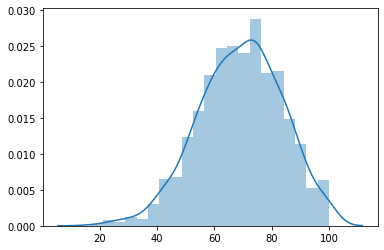

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(marks, hist=True)
plt.show()

We have learnt the definition of the four moments above and have calculated their values for the ```marks``` dataset.

Do the calculated values agree with what we can interpret visually from the histogram and the distribution plot?

---

You have learnt to calculate and interpret the four moments, which are commonly used in **Descriptive Data Analysis**. Congratulations..!!

In the next experiment, we will learn about another probability distribution called the ```Chi Squared Distribution``` and learn how probability distributions are used in **Confirmatory Data Analysis**.